In [1]:
# Chicago Crime Analysis
# W200 Fall 18 | Group Project 2
# Team members: Jonathan Hilton, Thanh Le, Eddie Zhu

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read Demographic data csv file
demo_orig_pd = pd.read_csv("zipcode_demographics.csv")

In [3]:
demo_orig_pd

,zipcode,Estimated zip code population in 2016,Zip code population in 2010,Zip code population in 2000,March 2016 Index,Land area,Water area,Population Density (#/sqr mile),Males,Females,...,Median real estate property taxes paid for housing units with no mortgage in 2016,Estimated median house/condo value in 2016,Estimated median household income in 2016,Median monthly owner costs for units with a mortgage,Median monthly owner costs for units without a mortgage,Median gross rent in 2016,Median price asked for vacant for-sale houses and condos in 2016,Unemployment,Lat,Lon
0,60601,13891.0,11110.0,5591.0,108.9,0.4 sq. mi.,0.0 sq. mi.,35947.0,7117.0,6773.0,...,"$6,604 (1.3%)",514220.0,108038.0,2795.0,1247.0,2040.0,1030230.0,0.039,41.885310,-87.622116
1,60602,1269.0,1204.0,70.0,110.1,0.1 sq. mi.,0.0 sq. mi.,14580.0,672.0,597.0,...,NaN,416659.0,88852.0,1906.0,NaN,2331.0,339727.0,0.005,41.883073,-87.629149
2,60603,1043.0,493.0,378.0,110.4,0.1 sq. mi.,0.0 sq. mi.,7198.0,452.0,591.0,...,"$7,296 (1.1%)",680818.0,146329.0,3253.0,1361.0,2422.0,748099.0,0.050,41.880188,-87.625509
3,60604,627.0,570.0,78.0,106.7,0.1 sq. mi.,0.0 sq. mi.,6773.0,308.0,319.0,...,"$5,018 (1.2%)",511002.0,156353.0,2585.0,1265.0,2030.0,339727.0,0.009,41.878095,-87.628461
4,60605,27004.0,24668.0,12423.0,107.3,1.2 sq. mi.,0.8 sq. mi.,21684.0,12907.0,14097.0,...,"$5,994 (1.4%)",419656.0,103862.0,2420.0,1034.0,1909.0,932097.0,0.033,41.867566,-87.617228
5,60606,3054.0,2308.0,1682.0,107.5,0.3 sq. mi.,0.0 sq. mi.,11954.0,1473.0,1580.0,...,"$5,336 (1.1%)",436749.0,124950.0,2749.0,1126.0,2129.0,339727.0,0.012,41.882066,-87.637349
6,60607,28784.0,23897.0,15552.0,106.9,2.3 sq. mi.,0.0 sq. mi.,12406.0,14257.0,14526.0,...,"$5,999 (1.6%)",387025.0,90063.0,2318.0,893.0,1740.0,1168344.0,0.048,41.874930,-87.651596
7,60608,79191.0,82739.0,92472.0,106.0,6.4 sq. mi.,0.2 sq. mi.,12469.0,43784.0,35410.0,...,"$3,382 (1.4%)",251616.0,39133.0,1791.0,592.0,862.0,255204.0,0.085,41.846880,-87.670664
8,60609,63142.0,64906.0,79469.0,104.0,7.8 sq. mi.,0.0 sq. mi.,8139.0,31179.0,31963.0,...,"$2,329 (1.7%)",174811.0,34078.0,1544.0,534.0,816.0,174322.0,0.149,41.812680,-87.656935
9,60610,38989.0,37726.0,47513.0,108.0,1.2 sq. mi.,0.4 sq. mi.,33253.0,17500.0,21487.0,...,"$6,867 (1.5%)",478703.0,80292.0,2575.0,1341.0,1445.0,504905.0,0.038,41.906772,-87.632231


In [4]:
demo_orig_pd.describe()

,zipcode,Estimated zip code population in 2016,Zip code population in 2010,Zip code population in 2000,March 2016 Index,Population Density (#/sqr mile),Males,Females,Property Tax % on Houses,Property Tax on Housting ($),Estimated median house/condo value in 2016,Estimated median household income in 2016,Median monthly owner costs for units with a mortgage,Median monthly owner costs for units without a mortgage,Median gross rent in 2016,Median price asked for vacant for-sale houses and condos in 2016,Unemployment,Lat,Lon
count,56.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,54.000000,55.000000,5.500000e+01,55.000000,56.000000,56.000000
mean,60629.875000,49390.763636,48400.072727,52337.309091,105.449091,16164.981818,23983.636364,25406.436364,0.014509,4234.981818,295130.581818,62708.618182,1958.618182,754.796296,1190.418182,4.084388e+05,0.085236,41.867838,-87.673440
std,17.800983,27019.836291,27077.880836,31172.246373,2.308108,8988.498339,13536.375258,13633.718996,0.001451,1772.508700,133802.535536,31379.233557,485.558918,270.354511,437.273950,2.882010e+05,0.058817,0.091462,0.062188
min,60601.000000,627.000000,493.000000,7.000000,100.800000,1268.000000,308.000000,319.000000,0.012000,1425.000000,99004.000000,20986.000000,1238.000000,443.000000,750.000000,1.059060e+05,0.005000,41.663809,-87.827132
25%,60614.750000,30321.500000,28679.500000,28985.000000,103.950000,9010.500000,14145.000000,16274.500000,0.013500,2655.000000,176586.000000,38595.000000,1553.000000,566.750000,915.500000,1.724170e+05,0.042000,41.796641,-87.711935
50%,60629.500000,49863.000000,48281.000000,51451.000000,105.800000,13499.000000,23303.000000,26129.000000,0.014000,4262.000000,269264.000000,55363.000000,1879.000000,676.000000,977.000000,3.397270e+05,0.063000,41.881285,-87.662840
75%,60644.250000,69673.000000,66306.500000,75489.000000,107.000000,21430.500000,33086.000000,35714.000000,0.015000,5514.500000,380809.500000,82560.000000,2282.500000,838.000000,1292.500000,4.946940e+05,0.128500,41.941767,-87.628977
max,60661.000000,116755.000000,113916.000000,113984.000000,110.400000,38783.000000,56685.000000,60069.000000,0.018000,8311.000000,680818.000000,156353.000000,3253.000000,1508.000000,2422.000000,1.168344e+06,0.261000,42.010019,-87.552739


In [5]:
columns = ["zipcode","Estimated median household income in 2016","Median gross rent in 2016","Unemployment","Lat","Lon"]
demo_pd = pd.DataFrame(demo_orig_pd, columns = columns)
demo_pd.head()

,zipcode,Estimated median household income in 2016,Median gross rent in 2016,Unemployment,Lat,Lon
0,60601,108038.0,2040.0,0.039,41.885310,-87.622116
1,60602,88852.0,2331.0,0.005,41.883073,-87.629149
2,60603,146329.0,2422.0,0.050,41.880188,-87.625509
3,60604,156353.0,2030.0,0.009,41.878095,-87.628461
4,60605,103862.0,1909.0,0.033,41.867566,-87.617228


In [6]:
demo_pd = demo_pd.rename(columns={"Estimated median household income in 2016":"median_income","Median gross rent in 2016":"median_rent"})
demo_pd.head()

,zipcode,median_income,median_rent,Unemployment,Lat,Lon
0,60601,108038.0,2040.0,0.039,41.885310,-87.622116
1,60602,88852.0,2331.0,0.005,41.883073,-87.629149
2,60603,146329.0,2422.0,0.050,41.880188,-87.625509
3,60604,156353.0,2030.0,0.009,41.878095,-87.628461
4,60605,103862.0,1909.0,0.033,41.867566,-87.617228


Text(0,0.5,'Dollars')

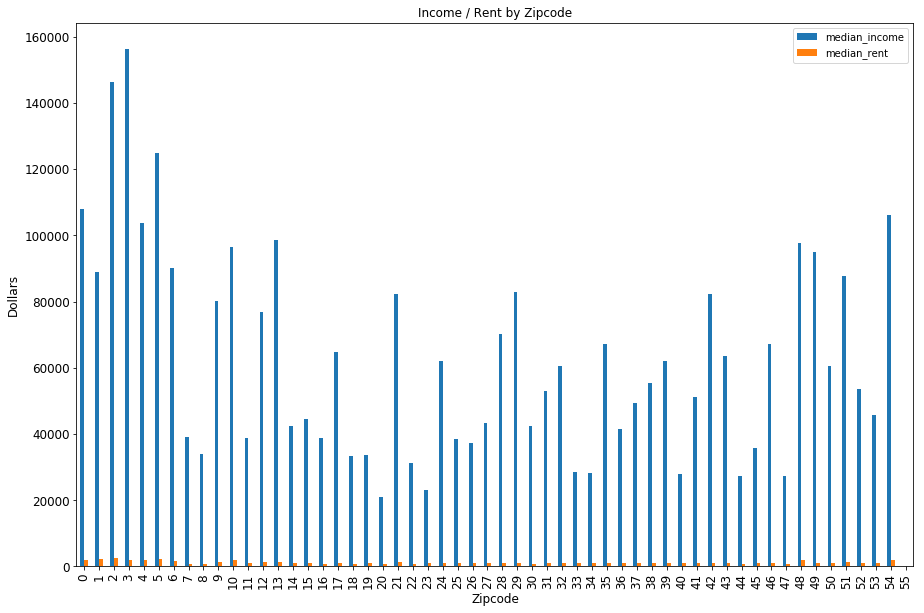

In [7]:
bar = demo_pd[["median_income","median_rent"]].plot(kind='bar', title ="Income / Rent by Zipcode",figsize=(15,10),legend=True, fontsize=12)
bar.set_xlabel("Zipcode",fontsize=12)
bar.set_ylabel("Dollars",fontsize=12)

In [8]:
crimezip_pd = pd.read_csv("zip_code_crimes2017_new.csv")

In [9]:
crimezip_pd

,primary_type,description,year,latitude,longitude,location,zip_code,dist_to_zip
0,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,2017,42.012293,-87.699714,"(42.012293397, -87.699714109)",60645,0.362998
1,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,2017,41.918712,-87.765511,"(41.918711651, -87.76551063)",60639,0.502180
2,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,2017,41.814670,-87.690727,"(41.814669784, -87.690726696)",60632,1.200173
3,DECEPTIVE PRACTICE,BOGUS CHECK,2017,41.938581,-87.765831,"(41.938581442, -87.765830579)",60641,1.124055
4,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,2017,41.895805,-87.683159,"(41.895805099, -87.683159355)",60622,0.439699
5,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,2017,41.787427,-87.621759,"(41.78742694, -87.621758727)",60621,1.192769
6,ROBBERY,ARMED: HANDGUN,2017,41.707062,-87.631483,"(41.707062135, -87.631482564)",60628,1.380224
7,THEFT,OVER $500,2017,41.844510,-87.705519,"(41.844510467, -87.705519454)",60623,0.694057
8,OTHER OFFENSE,VIOLENT OFFENDER: ANNUAL REGISTRATION,2017,41.843778,-87.694638,"(41.843778126, -87.694637678)",60623,1.235807
9,ROBBERY,ARMED: HANDGUN,2017,41.894476,-87.702169,"(41.894475919, -87.702169158)",60622,1.104111


In [10]:
crimezip_pd.describe()

,year,latitude,longitude,zip_code,dist_to_zip
count,267808.0,264997.000000,264997.000000,267808.000000,264997.000000
mean,2017.0,41.844502,-87.670220,60629.218272,0.795885
std,0.0,0.085991,0.058674,15.638925,0.458111
min,2017.0,41.644606,-87.928909,60601.000000,0.003804
25%,2017.0,41.769599,-87.712290,60618.000000,0.477490
50%,2017.0,41.865300,-87.664015,60626.000000,0.751875
75%,2017.0,41.906374,-87.627760,60642.000000,1.064941
max,2017.0,42.022671,-87.524529,60661.000000,5.592652


In [11]:
type(crimezip_pd)

pandas.core.frame.DataFrame

In [12]:
columns = ['latitude', 'longitude']
crimezip_pd = crimezip_pd.dropna(axis=0, how='any', subset=columns)

In [13]:
crimezip_pd

,primary_type,description,year,latitude,longitude,location,zip_code,dist_to_zip
0,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,2017,42.012293,-87.699714,"(42.012293397, -87.699714109)",60645,0.362998
1,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,2017,41.918712,-87.765511,"(41.918711651, -87.76551063)",60639,0.502180
2,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,2017,41.814670,-87.690727,"(41.814669784, -87.690726696)",60632,1.200173
3,DECEPTIVE PRACTICE,BOGUS CHECK,2017,41.938581,-87.765831,"(41.938581442, -87.765830579)",60641,1.124055
4,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,2017,41.895805,-87.683159,"(41.895805099, -87.683159355)",60622,0.439699
5,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,2017,41.787427,-87.621759,"(41.78742694, -87.621758727)",60621,1.192769
6,ROBBERY,ARMED: HANDGUN,2017,41.707062,-87.631483,"(41.707062135, -87.631482564)",60628,1.380224
7,THEFT,OVER $500,2017,41.844510,-87.705519,"(41.844510467, -87.705519454)",60623,0.694057
8,OTHER OFFENSE,VIOLENT OFFENDER: ANNUAL REGISTRATION,2017,41.843778,-87.694638,"(41.843778126, -87.694637678)",60623,1.235807
9,ROBBERY,ARMED: HANDGUN,2017,41.894476,-87.702169,"(41.894475919, -87.702169158)",60622,1.104111


In [14]:
crimezip_pd.describe()

,year,latitude,longitude,zip_code,dist_to_zip
count,264997.0,264997.000000,264997.000000,264997.000000,264997.000000
mean,2017.0,41.844502,-87.670220,60629.517602,0.795885
std,0.0,0.085991,0.058674,15.447788,0.458111
min,2017.0,41.644606,-87.928909,60601.000000,0.003804
25%,2017.0,41.769599,-87.712290,60619.000000,0.477490
50%,2017.0,41.865300,-87.664015,60628.000000,0.751875
75%,2017.0,41.906374,-87.627760,60643.000000,1.064941
max,2017.0,42.022671,-87.524529,60661.000000,5.592652


In [15]:
crimezip_pd = crimezip_pd.rename(columns={"zip_code":"zipcode"})
crimezip_pd.head()

,primary_type,description,year,latitude,longitude,location,zipcode,dist_to_zip
0,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,2017,42.012293,-87.699714,"(42.012293397, -87.699714109)",60645,0.362998
1,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,2017,41.918712,-87.765511,"(41.918711651, -87.76551063)",60639,0.502180
2,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,2017,41.814670,-87.690727,"(41.814669784, -87.690726696)",60632,1.200173
3,DECEPTIVE PRACTICE,BOGUS CHECK,2017,41.938581,-87.765831,"(41.938581442, -87.765830579)",60641,1.124055
4,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,2017,41.895805,-87.683159,"(41.895805099, -87.683159355)",60622,0.439699


In [16]:
crime_group = crimezip_pd.groupby(["zipcode"]).agg({"description":"count"}).reset_index()
crime_group

,zipcode,description
0,60601,3117
1,60602,3732
2,60603,1420
3,60604,2479
4,60605,1785
5,60606,1249
6,60607,3927
7,60608,4203
8,60609,5610
9,60610,3700


In [17]:
merge_crime_pd = crime_group.merge(demo_pd, on="zipcode", how="left")
merge_crime_pd

,zipcode,description,median_income,median_rent,Unemployment,Lat,Lon
0,60601,3117,108038.0,2040.0,0.039,41.885310,-87.622116
1,60602,3732,88852.0,2331.0,0.005,41.883073,-87.629149
2,60603,1420,146329.0,2422.0,0.050,41.880188,-87.625509
3,60604,2479,156353.0,2030.0,0.009,41.878095,-87.628461
4,60605,1785,103862.0,1909.0,0.033,41.867566,-87.617228
5,60606,1249,124950.0,2129.0,0.012,41.882066,-87.637349
6,60607,3927,90063.0,1740.0,0.048,41.874930,-87.651596
7,60608,4203,39133.0,862.0,0.085,41.846880,-87.670664
8,60609,5610,34078.0,816.0,0.149,41.812680,-87.656935
9,60610,3700,80292.0,1445.0,0.038,41.906772,-87.632231


In [18]:
merge_crime_pd = merge_crime_pd.rename(columns={"description":"crimes_count"})
merge_crime_pd.head()

,zipcode,crimes_count,median_income,median_rent,Unemployment,Lat,Lon
0,60601,3117,108038.0,2040.0,0.039,41.885310,-87.622116
1,60602,3732,88852.0,2331.0,0.005,41.883073,-87.629149
2,60603,1420,146329.0,2422.0,0.050,41.880188,-87.625509
3,60604,2479,156353.0,2030.0,0.009,41.878095,-87.628461
4,60605,1785,103862.0,1909.0,0.033,41.867566,-87.617228


In [19]:
crimes_zipcode = merge_crime_pd.set_index(["zipcode"])
crimes_zipcode

,crimes_count,median_income,median_rent,Unemployment,Lat,Lon
zipcode,,,,,,
60601,3117,108038.0,2040.0,0.039,41.885310,-87.622116
60602,3732,88852.0,2331.0,0.005,41.883073,-87.629149
60603,1420,146329.0,2422.0,0.050,41.880188,-87.625509
60604,2479,156353.0,2030.0,0.009,41.878095,-87.628461
60605,1785,103862.0,1909.0,0.033,41.867566,-87.617228
60606,1249,124950.0,2129.0,0.012,41.882066,-87.637349
60607,3927,90063.0,1740.0,0.048,41.874930,-87.651596
60608,4203,39133.0,862.0,0.085,41.846880,-87.670664
60609,5610,34078.0,816.0,0.149,41.812680,-87.656935


Text(0,0.5,'Dollars')

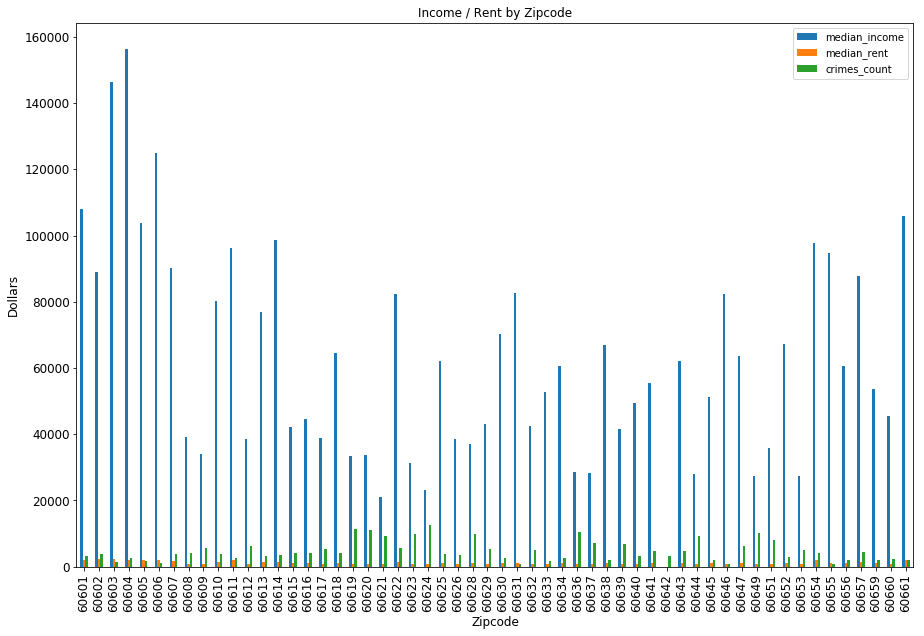

In [20]:
bar = crimes_zipcode[["median_income","median_rent","crimes_count"]].plot(kind='bar', title ="Income / Rent by Zipcode",figsize=(15,10),legend=True, fontsize=12)
bar.set_xlabel("Zipcode",fontsize=12)
bar.set_ylabel("Dollars",fontsize=12)

In [21]:
crimes_zipcode["median_income_log"] = np.log(crimes_zipcode["median_income"])
crimes_zipcode["median_rent_log"] = np.log(crimes_zipcode["median_rent"])
crimes_zipcode["crimes_count_log"] = np.log(crimes_zipcode["crimes_count"])

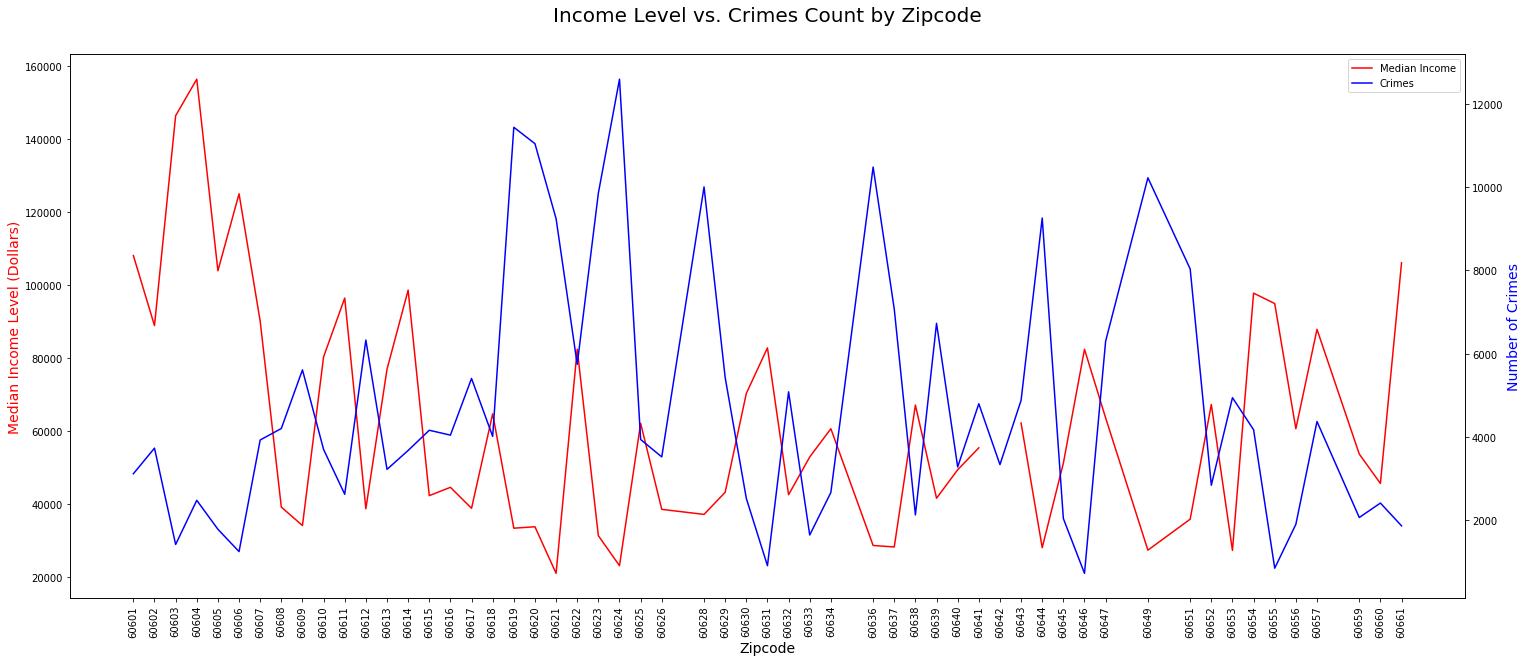

In [22]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ln1 = ax.plot(merge_crime_pd.zipcode, merge_crime_pd.median_income, label = "Median Income", color="red")
ax2 = ax.twinx()
ln2 = ax2.plot(merge_crime_pd.zipcode, merge_crime_pd.crimes_count, label = "Crimes", color="blue")
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
# ax.grid()
ax.set_xticks(merge_crime_pd.zipcode)
ax.set_xticklabels(merge_crime_pd.zipcode, rotation=90)
ax.set_title("Income Level vs. Crimes Count by Zipcode", fontsize=20, y=1.05)
ax.set_xlabel("Zipcode", fontsize=14)
ax.set_ylabel("Median Income Level (Dollars)", fontsize=14, color="red")
ax2.set_ylabel("Number of Crimes", fontsize=14, color="blue")
plt.show()


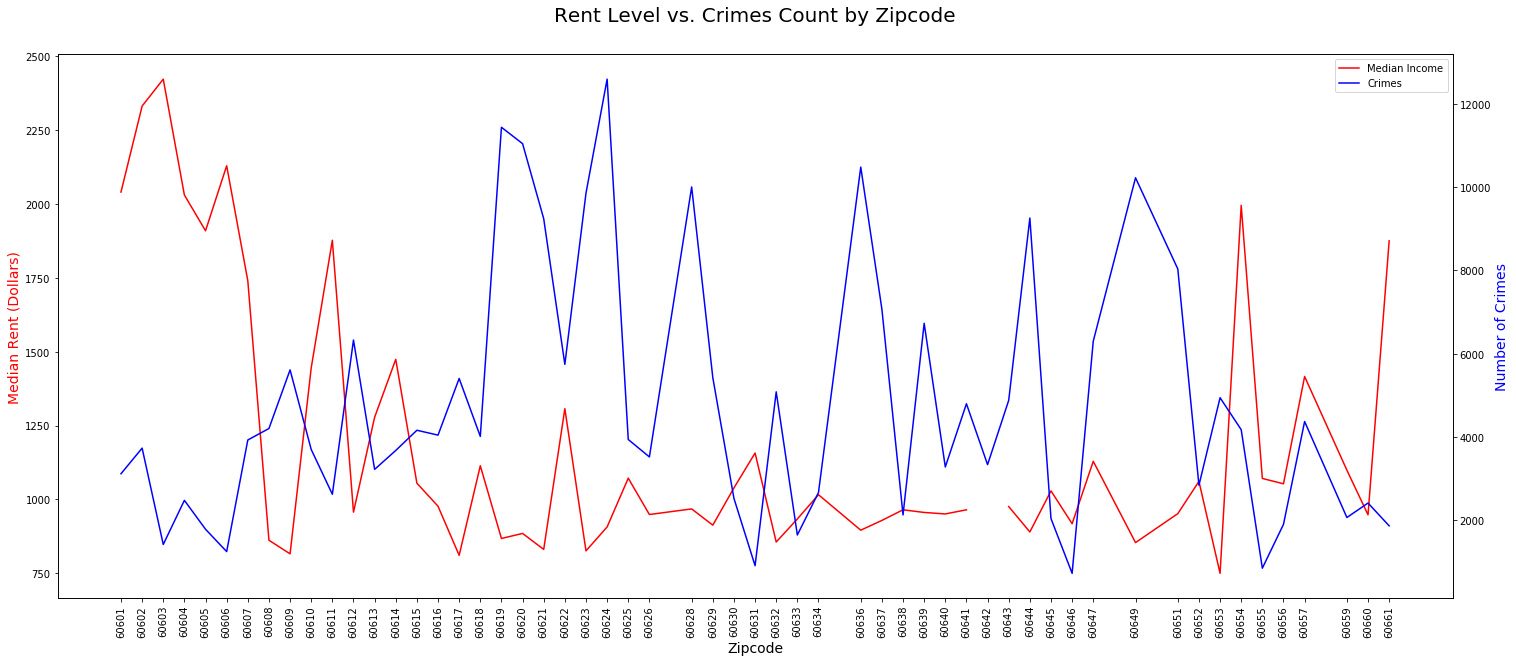

In [23]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ln1 = ax.plot(merge_crime_pd.zipcode, merge_crime_pd.median_rent, label = "Median Income", color="red")
ax2 = ax.twinx()
ln2 = ax2.plot(merge_crime_pd.zipcode, merge_crime_pd.crimes_count, label = "Crimes", color="blue")
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
# ax.grid()
ax.set_xticks(merge_crime_pd.zipcode)
ax.set_xticklabels(merge_crime_pd.zipcode, rotation=90)
ax.set_title("Rent Level vs. Crimes Count by Zipcode", fontsize=20, y=1.05)
ax.set_xlabel("Zipcode", fontsize=14)
ax.set_ylabel("Median Rent (Dollars)", fontsize=14, color="red")
ax2.set_ylabel("Number of Crimes", fontsize=14, color="blue")
plt.show()


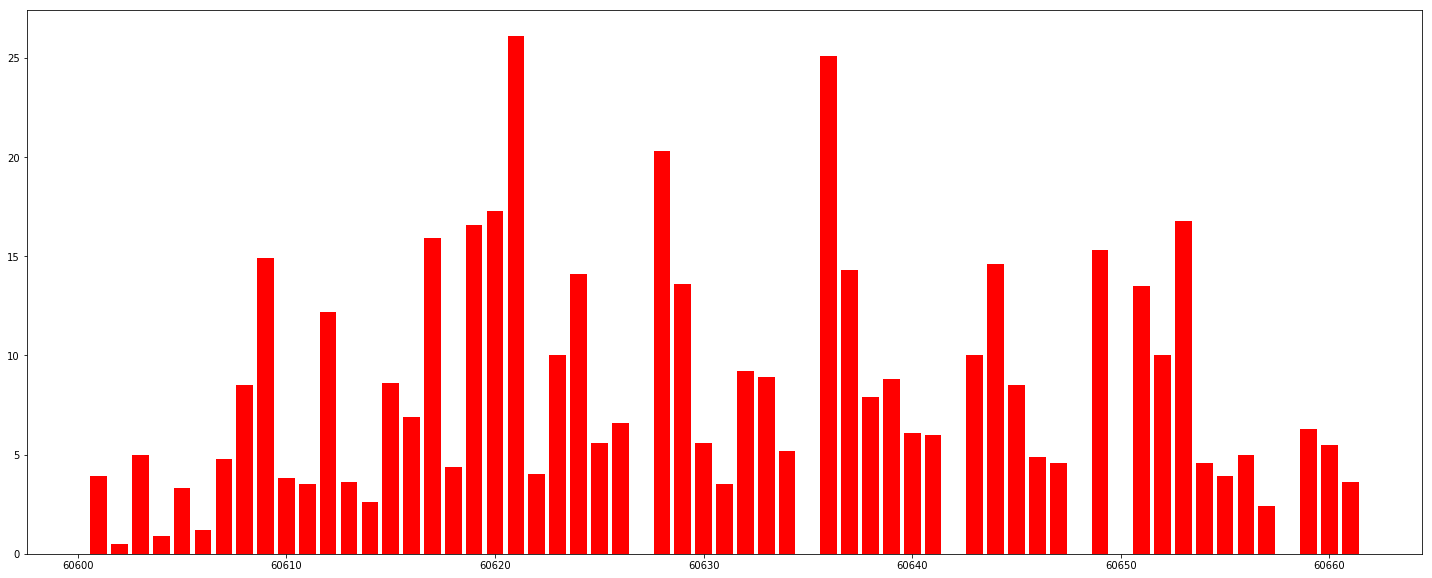

In [24]:
# fig = plt.figure(figsize=(25,10))
# ax = fig.add_subplot(111)
# # index = merge_crime_pd.zipcode

multiple_bars = plt.figure(figsize=(25,10))
ax = plt.subplot(111)
bar_width = 0.35
opacity = 0.8

bar1 = ax.bar(merge_crime_pd["zipcode"], (merge_crime_pd["Unemployment"]*100), label="Unemployment %", color="red")
 
# ax.bar(merge_crime_pd.zipcode, merge_crime_pd.Unemployment * 100, bar_width, alpha=opacity, color="red", label="Unemployment %")
# ax1 = ax.twinx()
# ax1.bar(merge_crime_pd.zipcode, merge_crime_pd.crimes_count, bar_width, alpha=opacity, color="blue", label="Number of Crimes")
# # bars = bar1 + bar2
# # labs = [l.get_label() for l in bars]
# # ax.legend(bars, labs, loc=0)


# ax.set_xticks(merge_crime_pd.zipcode)
# ax.set_xticklabels(merge_crime_pd.zipcode, rotation=90)
# plt.xlabel("Zipcode")
# plt.title("Unemployment % vs Crimes by Zipcode")
# # plt.legend()
# # plotly_fig = tls.mpl_to_plotly(multiple_bars)
# # py.iplot(plotly_fig, filename='mpl-multiple-bar')
# plt.tight_layout()
plt.show()

In [25]:
filtered_zip = merge_crime_pd[merge_crime_pd.median_income <= 60000]
filtered_zip

,zipcode,crimes_count,median_income,median_rent,Unemployment,Lat,Lon
7,60608,4203,39133.0,862.0,0.085,41.846880,-87.670664
8,60609,5610,34078.0,816.0,0.149,41.812680,-87.656935
11,60612,6326,38678.0,957.0,0.122,41.880320,-87.687749
14,60615,4161,42271.0,1055.0,0.086,41.801647,-87.596288
15,60616,4044,44551.0,977.0,0.069,41.844883,-87.624032
16,60617,5404,38799.0,811.0,0.159,41.718197,-87.552739
18,60619,11432,33352.0,868.0,0.166,41.743690,-87.605526
19,60620,11039,33745.0,885.0,0.173,41.740497,-87.652558
20,60621,9238,20986.0,831.0,0.261,41.776382,-87.639572
22,60623,9851,31295.0,826.0,0.100,41.848897,-87.717661


In [26]:
zipcode_list = np.unique(filtered_zip["zipcode"])

In [27]:
zipcode_list

array([60608, 60609, 60612, 60615, 60616, 60617, 60619, 60620, 60621,
       60623, 60624, 60626, 60628, 60629, 60632, 60633, 60636, 60637,
       60639, 60640, 60641, 60644, 60645, 60649, 60651, 60653, 60659,
       60660])

In [28]:
crime_details = crimezip_pd[(crimezip_pd.zipcode == 60608) | (crimezip_pd.zipcode == 60609) | (crimezip_pd.zipcode == 60612) | (crimezip_pd.zipcode == 60615) | (crimezip_pd.zipcode == 60616) | (crimezip_pd.zipcode == 60617) | (crimezip_pd.zipcode == 60619) | (crimezip_pd.zipcode == 60620) | (crimezip_pd.zipcode == 60621) | (crimezip_pd.zipcode == 60623) | (crimezip_pd.zipcode == 60624) | (crimezip_pd.zipcode == 60626) | (crimezip_pd.zipcode == 60628) | (crimezip_pd.zipcode == 60629) | (crimezip_pd.zipcode == 60632) | (crimezip_pd.zipcode == 60633) | (crimezip_pd.zipcode == 60636) | (crimezip_pd.zipcode == 60637) | (crimezip_pd.zipcode == 60639) | (crimezip_pd.zipcode == 60640) | (crimezip_pd.zipcode == 60641) | (crimezip_pd.zipcode == 60644) | (crimezip_pd.zipcode == 60645) | (crimezip_pd.zipcode == 60649) | (crimezip_pd.zipcode == 60651) | (crimezip_pd.zipcode == 60653) | (crimezip_pd.zipcode == 60659) | (crimezip_pd.zipcode == 60660)]
crime_details

,primary_type,description,year,latitude,longitude,location,zipcode,dist_to_zip
0,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,2017,42.012293,-87.699714,"(42.012293397, -87.699714109)",60645,0.362998
1,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,2017,41.918712,-87.765511,"(41.918711651, -87.76551063)",60639,0.502180
2,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,2017,41.814670,-87.690727,"(41.814669784, -87.690726696)",60632,1.200173
3,DECEPTIVE PRACTICE,BOGUS CHECK,2017,41.938581,-87.765831,"(41.938581442, -87.765830579)",60641,1.124055
5,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,2017,41.787427,-87.621759,"(41.78742694, -87.621758727)",60621,1.192769
6,ROBBERY,ARMED: HANDGUN,2017,41.707062,-87.631483,"(41.707062135, -87.631482564)",60628,1.380224
7,THEFT,OVER $500,2017,41.844510,-87.705519,"(41.844510467, -87.705519454)",60623,0.694057
8,OTHER OFFENSE,VIOLENT OFFENDER: ANNUAL REGISTRATION,2017,41.843778,-87.694638,"(41.843778126, -87.694637678)",60623,1.235807
12,ARSON,BY FIRE,2017,41.832571,-87.704686,"(41.832571089, -87.704685773)",60623,1.310001
25,ARSON,BY FIRE,2017,41.755645,-87.640508,"(41.755644606, -87.640508123)",60620,1.216202


In [29]:
crime_details_group = crime_details.groupby(["zipcode","primary_type"]).count()
crime_details_group

description  year  latitude  \
zipcode primary_type                                                     
60608   ARSON                                       10    10        10   
        ASSAULT                                    337   337       337   
        BATTERY                                    805   805       805   
        BURGLARY                                   283   283       283   
        CRIM SEXUAL ASSAULT                         28    28        28   
        CRIMINAL DAMAGE                            616   616       616   
        CRIMINAL TRESPASS                          111   111       111   
        DECEPTIVE PRACTICE                         191   191       191   
        GAMBLING                                     1     1         1   
        HOMICIDE                                    14    14        14   
        INTERFERENCE WITH PUBLIC OFFICER             9     9         9   
        LIQUOR LAW VIOLATION                         6     6         6   
        MOTOR VEHICLE THEFT                        179   179       179   
        NARCOTICS                                  106   106       106   
        OBSCENITY                                    1     1         1   
        OFFENSE INVOLVING CHILDREN                  33    33        33   
        OTHER OFFENSE                              293   293       293   
        PROSTITUTION                                 5     5         5   
        PUBLIC PEACE VIOLATION                      29    29        29   
        ROBBERY                                    177   177       177   
        SEX OFFENSE                                 21    21        21   
        STALKING                                     2     2         2   
        THEFT                                      869   869       869   
        WEAPONS VIOLATION                           77    77        77   
60609   ARSON                                       27    27        27   
        ASSAULT                                    502   502       502   
        BATTERY                                   1210  1210      1210   
        BURGLARY                                   256   256       256   
        CONCEALED CARRY LICENSE VIOLATION            1     1         1   
        CRIM SEXUAL ASSAULT                         25    25        25   
...                                                ...   ...       ...   
60659   PROSTITUTION                                 1     1         1   
        PUBLIC PEACE VIOLATION                       8     8         8   
        ROBBERY                                     76    76        76   
        SEX OFFENSE                                 11    11        11   
        STALKING                                     1     1         1   
        THEFT                                      539   539       539   
        WEAPONS VIOLATION                           11    11        11   
60660   ASSAULT                                    148   148       148   
        BATTERY                                    445   445       445   
        BURGLARY                                    85    85        85   
        CONCEALED CARRY LICENSE VIOLATION            1     1         1   
        CRIM SEXUAL ASSAULT                         18    18        18   
        CRIMINAL DAMAGE                            246   246       246   
        CRIMINAL TRESPASS                           84    84        84   
        DECEPTIVE PRACTICE                         239   239       239   
        HOMICIDE                                     2     2         2   
        INTERFERENCE WITH PUBLIC OFFICER             3     3         3   
        INTIMIDATION                                 4     4         4   
        KIDNAPPING                                   1     1         1   
        LIQUOR LAW VIOLATION                         3     3         3   
        MOTOR VEHICLE THEFT                         76    76        76   
        NARCOTICS                              

In [30]:
crime_details_group =crime_details_group.sort_values("description", ascending=False).reset_index()
crime_details_group

,zipcode,primary_type,description,year,latitude,longitude,location,dist_to_zip
0,60624,NARCOTICS,2654,2654,2654,2654,2654,2654
1,60624,BATTERY,2593,2593,2593,2593,2593,2593
2,60649,BATTERY,2492,2492,2492,2492,2492,2492
3,60636,BATTERY,2427,2427,2427,2427,2427,2427
4,60620,BATTERY,2391,2391,2391,2391,2391,2391
5,60619,BATTERY,2371,2371,2371,2371,2371,2371
6,60621,BATTERY,2278,2278,2278,2278,2278,2278
7,60623,BATTERY,2277,2277,2277,2277,2277,2277
8,60628,BATTERY,2157,2157,2157,2157,2157,2157
9,60619,THEFT,2151,2151,2151,2151,2151,2151


In [31]:
crimes_report = crime_details_group.groupby("zipcode").head(5)
crimes_report = crimes_report.drop(columns=["year", "latitude", "longitude", "location", "dist_to_zip"])
crimes_report

,zipcode,primary_type,description
0,60624,NARCOTICS,2654
1,60624,BATTERY,2593
2,60649,BATTERY,2492
3,60636,BATTERY,2427
4,60620,BATTERY,2391
5,60619,BATTERY,2371
6,60621,BATTERY,2278
7,60623,BATTERY,2277
8,60628,BATTERY,2157
9,60619,THEFT,2151


In [32]:
crimes_report = crimes_report.rename(columns={"description":"crimes_count"})
crimes_report.head()

,zipcode,primary_type,crimes_count
0,60624,NARCOTICS,2654
1,60624,BATTERY,2593
2,60649,BATTERY,2492
3,60636,BATTERY,2427
4,60620,BATTERY,2391


In [33]:
crime_list = list(np.unique(crimes_report["primary_type"]))
crime_list

['ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CRIMINAL DAMAGE',
 'DECEPTIVE PRACTICE',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'OTHER OFFENSE',
 'ROBBERY',
 'THEFT']

In [34]:
crimes_pt = crimes_report.pivot_table("crimes_count", index="zipcode", columns="primary_type").fillna(0)
crimes_pt

primary_type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,NARCOTICS,OTHER OFFENSE,ROBBERY,THEFT
zipcode,,,,,,,,,,
60608,337.0,805.0,0.0,616.0,0.0,0.0,0.0,293.0,0.0,869.0
60609,502.0,1210.0,0.0,635.0,0.0,0.0,0.0,423.0,0.0,1074.0
60612,550.0,1304.0,0.0,687.0,0.0,0.0,544.0,0.0,0.0,1127.0
60615,336.0,734.0,0.0,438.0,316.0,0.0,0.0,0.0,0.0,1116.0
60616,0.0,728.0,0.0,363.0,312.0,0.0,0.0,0.0,296.0,1089.0
60617,500.0,1240.0,0.0,802.0,0.0,0.0,0.0,472.0,0.0,870.0
60619,1005.0,2371.0,0.0,1367.0,0.0,0.0,0.0,848.0,0.0,2151.0
60620,962.0,2391.0,0.0,1263.0,0.0,0.0,0.0,866.0,0.0,2056.0
60621,908.0,2278.0,0.0,1039.0,0.0,0.0,0.0,707.0,0.0,1316.0


In [35]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ["background-color: lightblue" if v else '' for v in is_max]

crimes_pt_color = crimes_pt.style.apply(highlight_max, axis=1)
crimes_pt_color

primary_type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,NARCOTICS,OTHER OFFENSE,ROBBERY,THEFT
zipcode,,,,,,,,,,
60608,337,805,0,616,0,0,0,293,0,869
60609,502,1210,0,635,0,0,0,423,0,1074
60612,550,1304,0,687,0,0,544,0,0,1127
60615,336,734,0,438,316,0,0,0,0,1116
60616,0,728,0,363,312,0,0,0,296,1089
60617,500,1240,0,802,0,0,0,472,0,870
60619,1005,2371,0,1367,0,0,0,848,0,2151
60620,962,2391,0,1263,0,0,0,866,0,2056
60621,908,2278,0,1039,0,0,0,707,0,1316


In [36]:
crimes_total = crimes_report.groupby("primary_type").agg({"crimes_count":"sum"}).reset_index()
crimes_total

,primary_type,crimes_count
0,ASSAULT,13240
1,BATTERY,38278
2,BURGLARY,802
3,CRIMINAL DAMAGE,21267
4,DECEPTIVE PRACTICE,2137
5,MOTOR VEHICLE THEFT,959
6,NARCOTICS,5970
7,OTHER OFFENSE,8302
8,ROBBERY,296
9,THEFT,31753


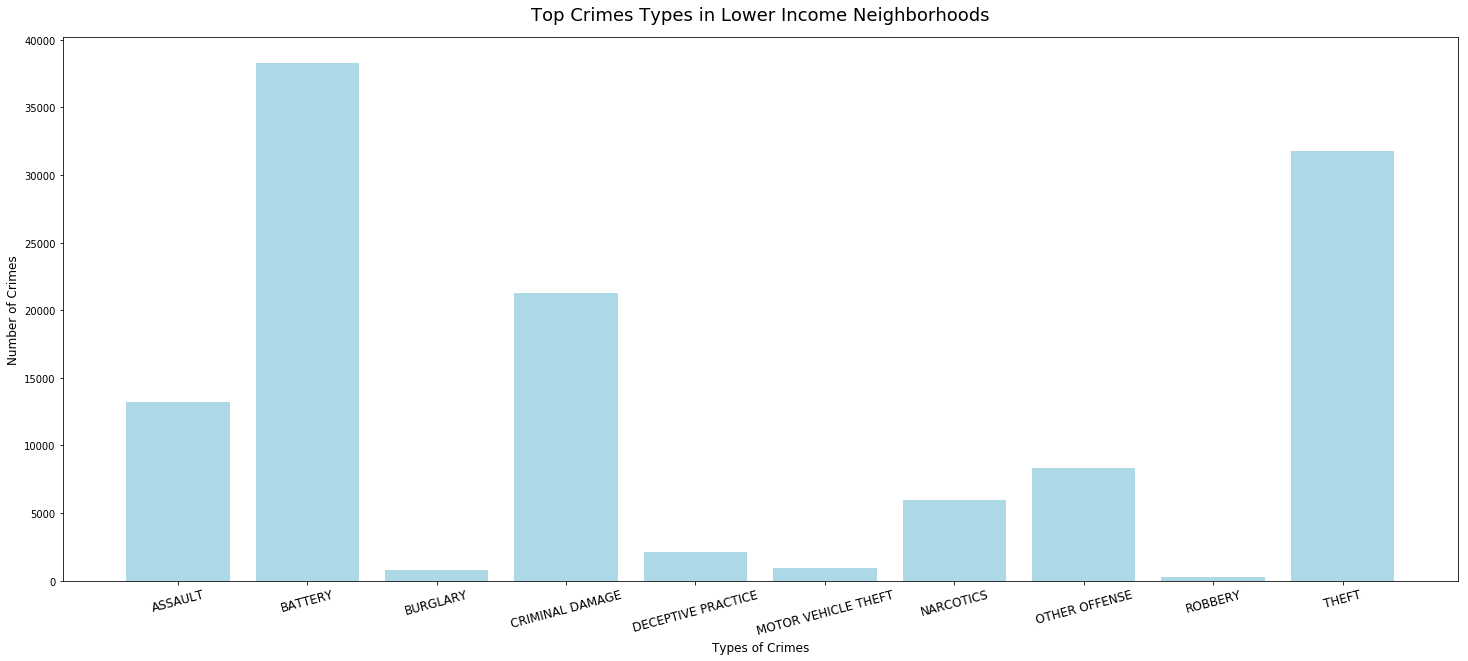

In [37]:
fig = plt.figure(figsize=(25, 10))
ax = plt.subplot(111)
# bar_width = 0.35
opacity = 0.8

ax.bar(crimes_total["primary_type"], crimes_total["crimes_count"], color="lightblue")
ax.set_xticks(crimes_total.primary_type)
ax.set_xticklabels(crimes_total.primary_type, rotation=15, fontsize = 12)
plt.xlabel("Types of Crimes", fontsize = 12)
plt.ylabel("Number of Crimes", fontsize = 12)
plt.title("Top Crimes Types in Lower Income Neighborhoods", fontsize = 18, y = 1.02)
plt.show()

In [38]:
filtered_zip_high = merge_crime_pd[merge_crime_pd.median_income >= 100000]
filtered_zip_high

,zipcode,crimes_count,median_income,median_rent,Unemployment,Lat,Lon
0,60601,3117,108038.0,2040.0,0.039,41.885310,-87.622116
2,60603,1420,146329.0,2422.0,0.050,41.880188,-87.625509
3,60604,2479,156353.0,2030.0,0.009,41.878095,-87.628461
4,60605,1785,103862.0,1909.0,0.033,41.867566,-87.617228
5,60606,1249,124950.0,2129.0,0.012,41.882066,-87.637349
55,60661,1867,106053.0,1875.0,0.036,41.883030,-87.644101


In [39]:
zipcode_list_high = np.unique(filtered_zip_high["zipcode"])
zipcode_list_high

array([60601, 60603, 60604, 60605, 60606, 60661])

In [40]:
crime_details_high = crimezip_pd[(crimezip_pd.zipcode == 60601) | (crimezip_pd.zipcode == 60603) | (crimezip_pd.zipcode == 60604) | (crimezip_pd.zipcode == 60605) | (crimezip_pd.zipcode == 60606) | (crimezip_pd.zipcode == 60661)]
crime_details_high

,primary_type,description,year,latitude,longitude,location,zipcode,dist_to_zip
86,THEFT,OVER $500,2017,41.888702,-87.647571,"(41.888701814, -87.647570608)",60661,0.430311
143,CRIMINAL DAMAGE,TO VEHICLE,2017,41.886815,-87.641847,"(41.88681513, -87.641847038)",60661,0.285876
150,THEFT,POCKET-PICKING,2017,41.880653,-87.634397,"(41.880653112, -87.634396649)",60606,0.180417
154,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,2017,41.876121,-87.641004,"(41.876121224, -87.641003973)",60606,0.451421
169,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,2017,41.880653,-87.634397,"(41.880653112, -87.634396649)",60606,0.180417
184,THEFT,$500 AND UNDER,2017,41.872569,-87.625955,"(41.872569023, -87.625955471)",60604,0.402700
187,ASSAULT,SIMPLE,2017,41.878145,-87.631233,"(41.878144785, -87.631233035)",60604,0.142548
203,THEFT,RETAIL THEFT,2017,41.879893,-87.627722,"(41.879893301, -87.627721751)",60603,0.115557
211,THEFT,FROM BUILDING,2017,41.890024,-87.653906,"(41.890023779, -87.653906494)",60661,0.698010
231,THEFT,$500 AND UNDER,2017,41.879246,-87.644962,"(41.879246012, -87.644961751)",60661,0.264987


In [41]:
crime_details_group_high = crime_details_high.groupby(["zipcode","primary_type"]).count()
crime_details_group_high

description  year  latitude  \
zipcode primary_type                                                    
60601   ARSON                                       1     1         1   
        ASSAULT                                    96    96        96   
        BATTERY                                   232   232       232   
        BURGLARY                                   20    20        20   
        CRIM SEXUAL ASSAULT                        12    12        12   
        CRIMINAL DAMAGE                           128   128       128   
        CRIMINAL TRESPASS                          74    74        74   
        DECEPTIVE PRACTICE                        494   494       494   
        INTERFERENCE WITH PUBLIC OFFICER            1     1         1   
        INTIMIDATION                                3     3         3   
        LIQUOR LAW VIOLATION                        3     3         3   
        MOTOR VEHICLE THEFT                        46    46        46   
        NARCOTICS                                  26    26        26   
        NON-CRIMINAL                                1     1         1   
        OBSCENITY                                   1     1         1   
        OFFENSE INVOLVING CHILDREN                  3     3         3   
        OTHER NARCOTIC VIOLATION                    1     1         1   
        OTHER OFFENSE                              65    65        65   
        PROSTITUTION                               18    18        18   
        PUBLIC INDECENCY                            2     2         2   
        PUBLIC PEACE VIOLATION                     19    19        19   
        ROBBERY                                    85    85        85   
        SEX OFFENSE                                 3     3         3   
        THEFT                                    1783  1783      1783   
60603   ARSON                                       1     1         1   
        ASSAULT                                    59    59        59   
        BATTERY                                    97    97        97   
        BURGLARY                                   16    16        16   
        CRIM SEXUAL ASSAULT                         2     2         2   
        CRIMINAL DAMAGE                            42    42        42   
...                                               ...   ...       ...   
60606   MOTOR VEHICLE THEFT                        28    28        28   
        NARCOTICS                                  48    48        48   
        NON-CRIMINAL                                1     1         1   
        OTHER OFFENSE                              38    38        38   
        PUBLIC PEACE VIOLATION                     12    12        12   
        ROBBERY                                    39    39        39   
        SEX OFFENSE                                 1     1         1   
        STALKING                                    2     2         2   
        THEFT                                     609   609       609   
        WEAPONS VIOLATION                           1     1         1   
60661   ARSON                                       1     1         1   
        ASSAULT                                    58    58        58   
        BATTERY                                   128   128       128   
        BURGLARY                                   74    74        74   
        CRIM SEXUAL ASSAULT                         9     9         9   
        CRIMINAL DAMAGE                           163   163       163   
        CRIMINAL TRESPASS                          33    33        33   
        DECEPTIVE PRACTICE                        163   163       163   
        HOMICIDE                                    1     1         1   
        LIQUOR LAW VIOLATION                        1     1         1   
        MOTOR VEHICLE THEFT                        99    99        99   
        NARCOTICS                                  10    10        10   
        OFFENSE INVOLVING C

In [42]:
crime_details_group_high =crime_details_group_high.sort_values("description", ascending=False).reset_index()
crime_details_group_high

,zipcode,primary_type,description,year,latitude,longitude,location,dist_to_zip
0,60601,THEFT,1783,1783,1783,1783,1783,1783
1,60604,THEFT,1125,1125,1125,1125,1125,1125
2,60661,THEFT,987,987,987,987,987,987
3,60603,THEFT,887,887,887,887,887,887
4,60605,THEFT,618,618,618,618,618,618
5,60606,THEFT,609,609,609,609,609,609
6,60601,DECEPTIVE PRACTICE,494,494,494,494,494,494
7,60604,BATTERY,318,318,318,318,318,318
8,60605,DECEPTIVE PRACTICE,296,296,296,296,296,296
9,60604,DECEPTIVE PRACTICE,296,296,296,296,296,296


In [43]:
crimes_report_high = crime_details_group_high.groupby("zipcode").head(5)
crimes_report_high = crimes_report_high.drop(columns=["year", "latitude", "longitude", "location", "dist_to_zip"])
crimes_report_high

,zipcode,primary_type,description
0,60601,THEFT,1783
1,60604,THEFT,1125
2,60661,THEFT,987
3,60603,THEFT,887
4,60605,THEFT,618
5,60606,THEFT,609
6,60601,DECEPTIVE PRACTICE,494
7,60604,BATTERY,318
8,60605,DECEPTIVE PRACTICE,296
9,60604,DECEPTIVE PRACTICE,296


In [44]:
crimes_report_high = crimes_report_high.rename(columns={"description":"crimes_count"})
crimes_report_high.head()

,zipcode,primary_type,crimes_count
0,60601,THEFT,1783
1,60604,THEFT,1125
2,60661,THEFT,987
3,60603,THEFT,887
4,60605,THEFT,618


In [45]:
crimes_pt_high = crimes_report_high.pivot_table("crimes_count", index="zipcode", columns="primary_type").fillna(0)
crimes_pt_high

primary_type,ASSAULT,BATTERY,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,ROBBERY,THEFT
zipcode,,,,,,,
60601,96.0,232.0,128.0,494.0,0.0,0.0,1783.0
60603,59.0,97.0,42.0,187.0,0.0,0.0,887.0
60604,138.0,318.0,0.0,296.0,0.0,145.0,1125.0
60605,0.0,237.0,113.0,296.0,0.0,100.0,618.0
60606,54.0,88.0,75.0,200.0,0.0,0.0,609.0
60661,0.0,128.0,163.0,163.0,99.0,0.0,987.0


In [46]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ["background-color: lightblue" if v else '' for v in is_max]

crimes_pt_high_color = crimes_pt_high.style.apply(highlight_max, axis=1)
crimes_pt_high_color

primary_type,ASSAULT,BATTERY,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,ROBBERY,THEFT
zipcode,,,,,,,
60601,96,232,128,494,0,0,1783
60603,59,97,42,187,0,0,887
60604,138,318,0,296,0,145,1125
60605,0,237,113,296,0,100,618
60606,54,88,75,200,0,0,609
60661,0,128,163,163,99,0,987


In [47]:
crimes_total_high = crimes_report_high.groupby("primary_type").agg({"crimes_count":"sum"}).reset_index()
crimes_total_high

,primary_type,crimes_count
0,ASSAULT,347
1,BATTERY,1100
2,CRIMINAL DAMAGE,521
3,DECEPTIVE PRACTICE,1636
4,MOTOR VEHICLE THEFT,99
5,ROBBERY,245
6,THEFT,6009


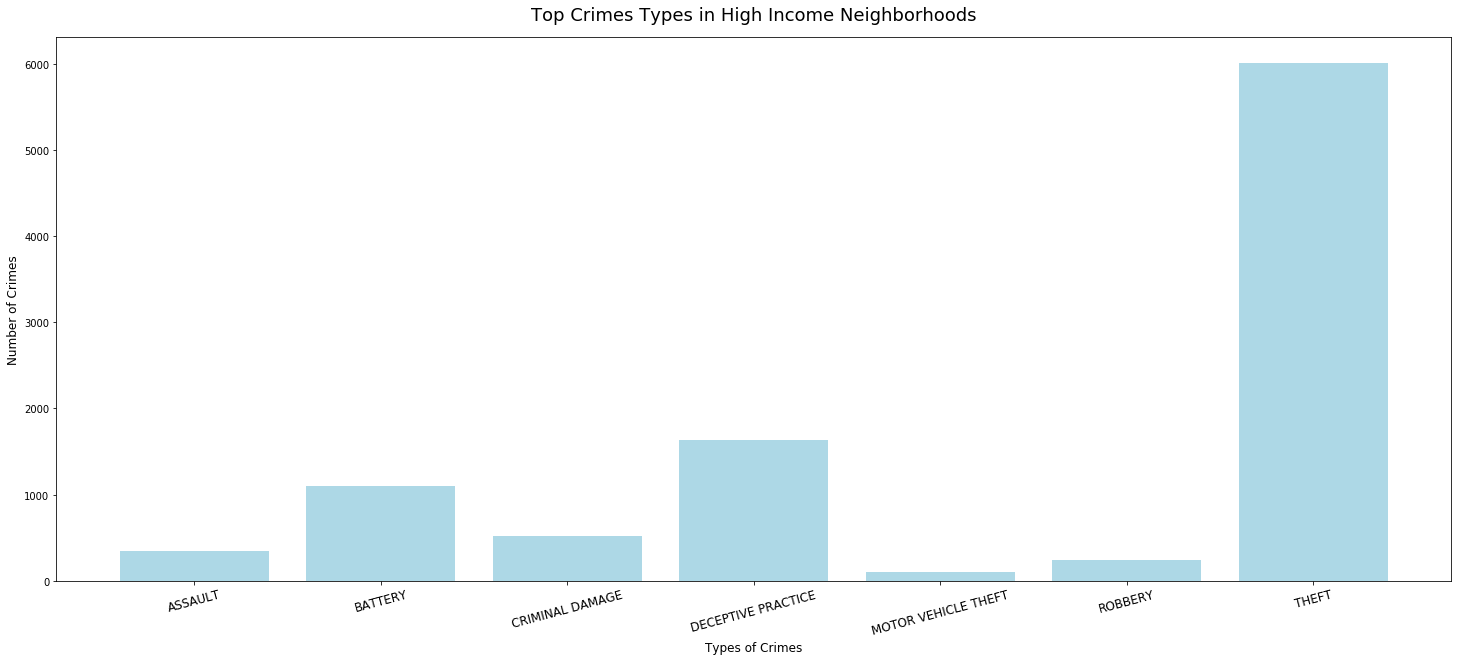

In [48]:
fig = plt.figure(figsize=(25, 10))
ax = plt.subplot(111)
# bar_width = 0.35
opacity = 0.8

ax.bar(crimes_total_high["primary_type"], crimes_total_high["crimes_count"], color="lightblue")
ax.set_xticks(crimes_total_high.primary_type)
ax.set_xticklabels(crimes_total_high.primary_type, rotation=15, fontsize = 12)
plt.xlabel("Types of Crimes", fontsize = 12)
plt.ylabel("Number of Crimes", fontsize = 12)
plt.title("Top Crimes Types in High Income Neighborhoods", fontsize = 18, y = 1.02)
plt.show()